<a href="https://colab.research.google.com/github/Lakshana002/YOLO_v8/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 22.2 MB/s eta 0:00:00


In [2]:
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Step 1: Extract the ZIP File
zip_path = "/content/drive/MyDrive/Images.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")


Dataset extracted to dataset


In [4]:
# Step 2: Split Dataset (80:20)
train_path = "dataset_split/train"
val_path = "dataset_split/val"

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

for class_name in os.listdir(extract_path):
    class_dir = os.path.join(extract_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Copy to train folder
        train_class_dir = os.path.join(train_path, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_class_dir, img))

        # Copy to val folder
        val_class_dir = os.path.join(val_path, class_name)
        os.makedirs(val_class_dir, exist_ok=True)
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_class_dir, img))

print("Dataset split into training and validation sets.")

Dataset split into training and validation sets.


In [5]:
# Step 3: Train YOLOv8 Model
model = YOLO('yolov8n-cls.pt')  # Use 'yolov8s-cls.pt' for a larger model
results = model.train(data="dataset_split", epochs=30, imgsz=224)

100%|██████████| 5.31M/5.31M [00:00<00:00, 56.3MB/s]


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=dataset_split, epochs=30, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.4MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset_split/train... 3956 images, 0 corrupt: 100%|██████████| 3956/3956 [00:01<00:00, 3766.03it/s]

train: New cache created: /content/dataset_split/train.cache



val: Scanning /content/dataset_split/val... 990 images, 0 corrupt: 100%|██████████| 990/990 [00:00<00:00, 1963.41it/s]

val: New cache created: /content/dataset_split/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30     0.289G      1.488         16        224:   3%|▎         | 7/248 [00:01<00:34,  6.89it/s]

       1/30     0.289G      1.481         16        224:   4%|▍         | 11/248 [00:02<00:38,  6.19it/s]
100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  4.87it/s]

                   all      0.738          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  4.54it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  6.07it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:09<00:00,  3.34it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  6.09it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:07<00:00,  3.99it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.84it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:09<00:00,  3.43it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.84it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30     0.243G     0.1978          4        224: 100%|██████████| 248/248 [00:41<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:09<00:00,  3.39it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30     0.241G     0.1908          4        224: 100%|██████████| 248/248 [00:41<00:00,  6.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.85it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.243G     0.1793          4        224: 100%|██████████| 248/248 [00:40<00:00,  6.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.243G     0.1655          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.90it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.243G     0.1622          4        224: 100%|██████████| 248/248 [00:44<00:00,  5.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  5.01it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.243G     0.1471          4        224: 100%|██████████| 248/248 [00:38<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.82it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.243G     0.1338          4        224: 100%|██████████| 248/248 [00:41<00:00,  6.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  4.69it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.243G     0.1359          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  4.61it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.243G     0.1177          4        224: 100%|██████████| 248/248 [00:40<00:00,  6.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.79it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.243G     0.1227          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:06<00:00,  4.65it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.243G    0.09501          4        224: 100%|██████████| 248/248 [00:43<00:00,  5.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.96it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30     0.243G     0.1015          4        224: 100%|██████████| 248/248 [00:40<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:08<00:00,  3.48it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.243G     0.1072          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.65it/s]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.243G    0.09512          4        224: 100%|██████████| 248/248 [00:42<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:07<00:00,  4.22it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.243G    0.09467          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.33it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.243G      0.079          4        224: 100%|██████████| 248/248 [00:45<00:00,  5.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:04<00:00,  6.22it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.243G    0.08139          4        224: 100%|██████████| 248/248 [00:37<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:07<00:00,  4.36it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.243G     0.0735          4        224: 100%|██████████| 248/248 [00:41<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.57it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.243G    0.07462          4        224: 100%|██████████| 248/248 [00:39<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.243G    0.08802          4        224: 100%|██████████| 248/248 [00:41<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.89it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.243G    0.07387          4        224: 100%|██████████| 248/248 [00:40<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:07<00:00,  4.11it/s]

                   all      0.985          1



30 epochs completed in 0.407 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset_split/train... found 3956 images in 4 classes ✅ 
val: /content/dataset_split/val... found 990 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:05<00:00,  5.39it/s]


                   all      0.986          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [6]:
# Print the structure of the results object
print(dir(results))  # Lists all attributes and methods

# Check if 'results_dict' exists and its keys
if hasattr(results, 'results_dict'):
    print(results.results_dict.keys())
else:
    print("No 'results_dict' found in results.")


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'process', 'results_dict', 'save_dir', 'speed', 'task', 'top1', 'top5']
dict_keys(['metrics/accuracy_top1', 'metrics/accuracy_top5', 'fitness'])


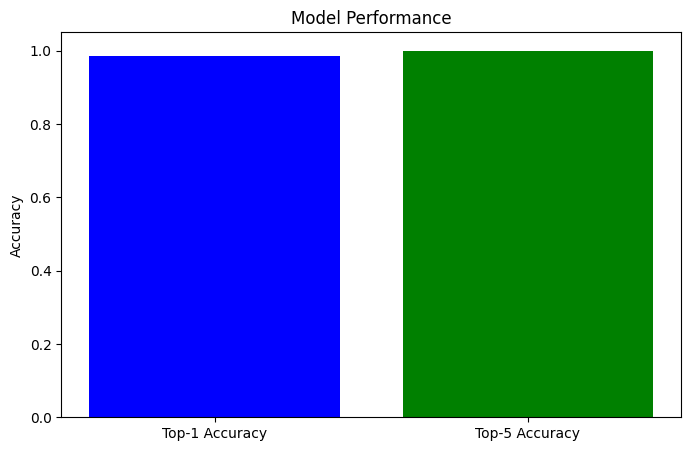

Speed Metrics (in ms):
preprocess: 0.08457622142753216 ms
inference: 0.386461585459083 ms
loss: 0.001916740879868016 ms
postprocess: 0.0004016991817589962 ms


In [7]:
# Access training and validation metrics
train_top1_acc = results.top1  # Top-1 accuracy
val_top5_acc = results.top5    # Top-5 accuracy
speed = results.speed          # Timing metrics

# Visualize Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(['Top-1 Accuracy', 'Top-5 Accuracy'], [train_top1_acc, val_top5_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.show()

# Print Speed Metrics
print("Speed Metrics (in ms):")
for key, value in speed.items():
    print(f"{key}: {value} ms")


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Check if history or logging is available
if hasattr(results, 'history'):
    history = results.history
    print("History available:", history)
else:
    print("History not available. Using CSV log files.")

# Access metrics from 'results.csv' (default path: runs/classify/train/results.csv)
log_path = "runs/classify/train/results.csv"  # Adjust this path based on your setup
data = pd.read_csv(log_path)

# Preview the metrics logged
print(data.head())

History not available. Using CSV log files.
   epoch      time  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  \
0      1   55.0341     1.09716                0.73838                      1   
1      2  103.1470     0.69398                0.85455                      1   
2      3  156.0940     0.50799                0.89192                      1   
3      4  207.7910     0.43327                0.91111                      1   
4      5  253.5300     0.36309                0.93838                      1   

   val/loss    lr/pg0    lr/pg1    lr/pg2  
0   1.06363  0.000237  0.000237  0.000237  
1   0.92802  0.000459  0.000459  0.000459  
2   0.87492  0.000666  0.000666  0.000666  
3   0.85309  0.000643  0.000643  0.000643  
4   0.82003  0.000620  0.000620  0.000620  


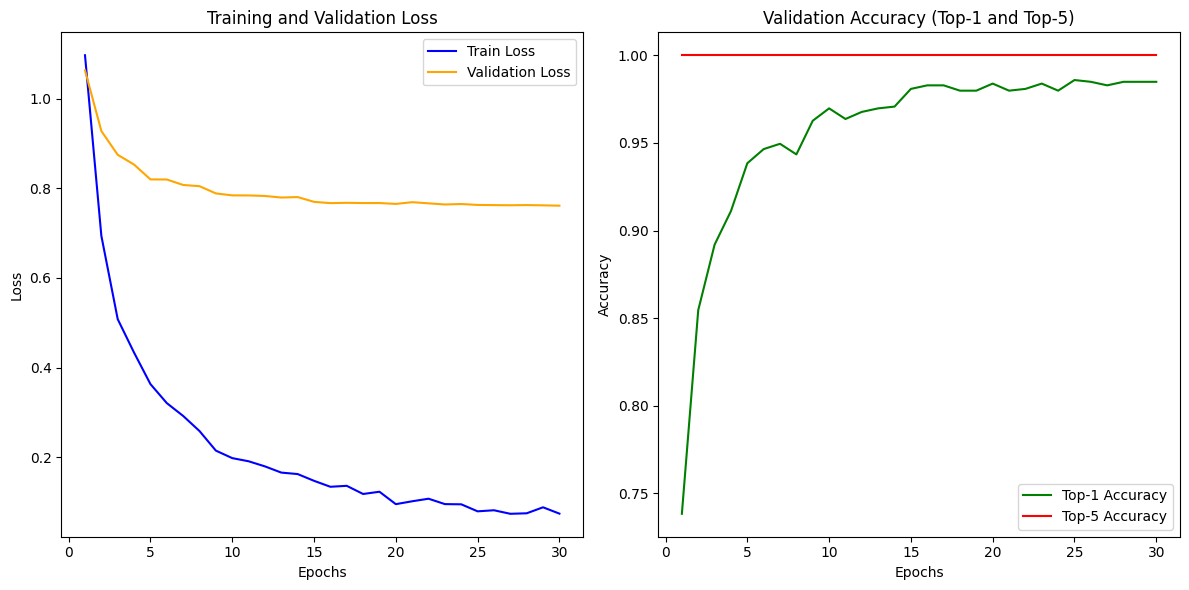

In [10]:
# Extract metrics
epochs = data['epoch']
train_loss = data['train/loss']
val_loss = data['val/loss']
top1_accuracy = data['metrics/accuracy_top1']
top5_accuracy = data['metrics/accuracy_top5']

# Visualize Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualize Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, top1_accuracy, label='Top-1 Accuracy', color='green')
plt.plot(epochs, top5_accuracy, label='Top-5 Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy (Top-1 and Top-5)')
plt.legend()

plt.tight_layout()
plt.show()


image 1/1 /content/drive/MyDrive/dataset/blast/100638.jpg: 224x224 blast 1.00, normal 0.00, brown_spot 0.00, bacterial_leaf_blight 0.00, 3.5ms
Speed: 16.5ms preprocess, 3.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Actual Class: blast
Predicted Class: blast
Confidence: 1.00


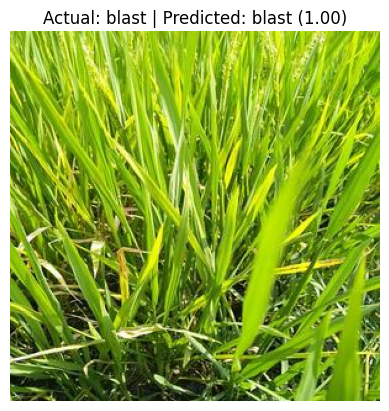

In [12]:
import os
import random
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Define the test dataset path
test_folder = "/content/drive/MyDrive/dataset"

# Load the trained YOLO model
model = YOLO("/content/runs/classify/train/weights/best.pt")  # Replace with your saved model path

# Step 1: Select a random class folder and image
classes = os.listdir(test_folder)  # List of class subfolders
random_class = random.choice(classes)
class_folder = os.path.join(test_folder, random_class)
random_image = random.choice(os.listdir(class_folder))  # Random image in the selected folder
image_path = os.path.join(class_folder, random_image)

# Step 2: Perform prediction
results = model.predict(image_path)

# Step 3: Extract predicted class and confidence
predicted_class_index = results[0].probs.top1  # Index of the top-1 predicted class
predicted_class = results[0].names[predicted_class_index]  # Predicted class name
confidence = results[0].probs.top1conf.item()  # Confidence score for the top-1 prediction

# Step 4: Compare actual and predicted class
actual_class = random_class

# Print results
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

# Step 5: Display the image and predictions
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.title(f"Actual: {actual_class} | Predicted: {predicted_class} ({confidence:.2f})")
plt.show()